# Testing the Musical MDN Code

- Setup the system.

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import random
import numpy as np
import tensorflow as tf
import musical_mdn
import matplotlib.pyplot as plt
import pandas as pd

musical_mdn.MODEL_DIR = "/home/kaiolae/tf_models/mdn-experiments/"
print(musical_mdn.MODEL_DIR)

/home/kaiolae/tf_models/mdn-experiments/


## Training Test

In [ ]:
x_t_log = musical_mdn.generate_data()
loader = musical_mdn.SequenceDataLoader(num_steps = 121,batch_size = 100, corpus = x_t_log)
net = musical_mdn.TinyJamNet2D(mode = musical_mdn.NET_MODE_TRAIN, n_hidden_units = 128, n_mixtures = 10, batch_size = 100, sequence_length = 120)
losses = net.train(loader, 30, saving=True)
## Plot the losses.
plt.plot(losses)
plt.show()

## Evaluation Test

Predict 10000 Datapoints and plot some segments.

In [2]:
## Evaluation Test:
## Predict 10000 Datapoints.
net = musical_mdn.TinyJamNet2D(mode = musical_mdn.NET_MODE_RUN, n_hidden_units = 128, n_mixtures = 10, batch_size = 1, sequence_length = 1)

INFO:tensorflow:Loading Running Operations
INFO:tensorflow:done initialising: tiny-perf-mdn-1layers-128units vars: 73522


Test Input: [ 0.01080831 -7.65031484]
INFO:tensorflow:Restoring parameters from /home/kaiolae/tf_models/mdn-experiments/tiny-perf-mdn-1layers-128units
Test Output:


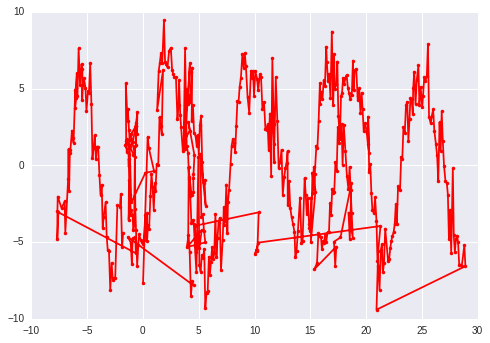

                t           x        time
count  501.000000  501.000000  501.000000
mean    -0.003539   -0.044229    9.537947
std      0.799056    4.285063    9.862715
min    -10.943375   -9.407005   -7.671872
25%      0.088052   -3.953282    1.074006
50%      0.102168    0.186062    8.154593
75%      0.116403    3.652947   17.657597
max      0.547366    9.440527   28.895473
Window: 1000 to 1100


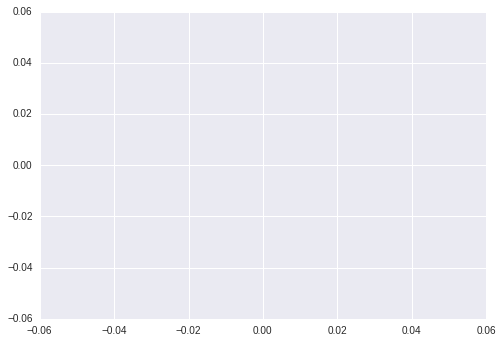

Window: 2000 to 2100


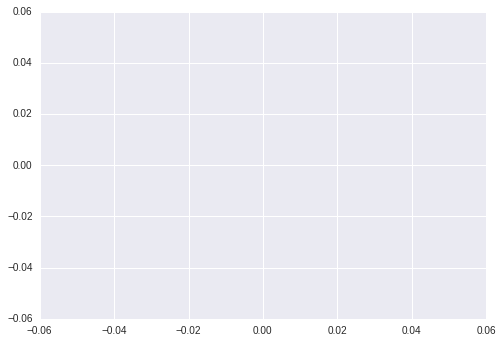

Window: 3000 to 3100


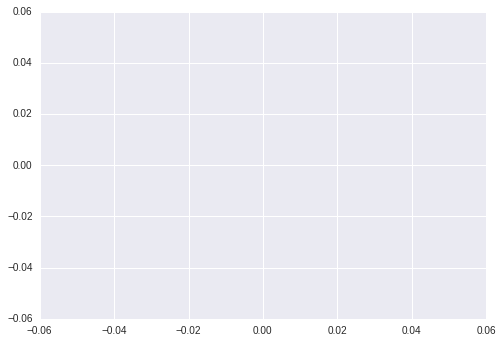

Window: 4000 to 4100


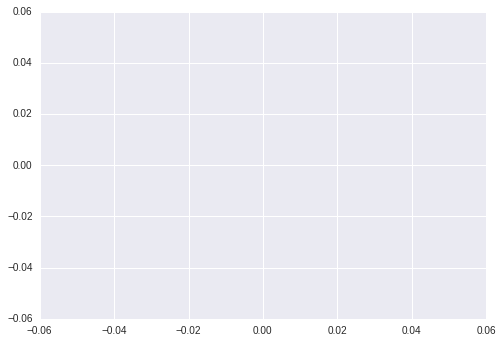

Window: 5000 to 5100


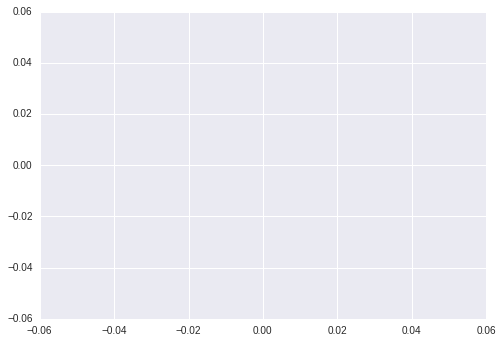

Window: 6000 to 6100


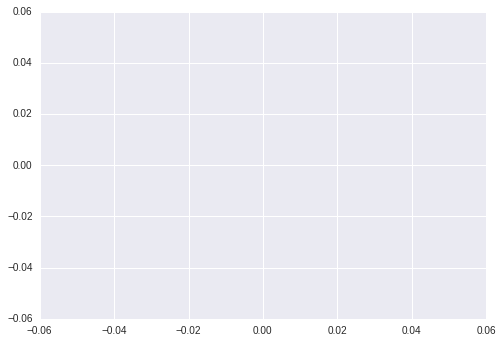

In [3]:
first_touch = np.array([(0.01 + (np.random.rand()-0.5)*0.005), (np.random.rand()-0.5)*20])
print("Test Input:",first_touch)
with tf.Session() as sess:
    perf = net.generate_performance(first_touch,500,sess,True)
print("Test Output:")
perf_df = pd.DataFrame({'t':perf.T[0], 'x':perf.T[1]})
perf_df['time'] = perf_df.t.cumsum()
#plt.show(perf_df.plot('time','x',kind='scatter'))
plt.plot(perf_df.time, perf_df.x, '.r-')
plt.show()
print(perf_df.describe())
## Investigate Output
window = 100
for n in [1000,2000,3000,4000,5000,6000]:
    print("Window:", str(n),'to',str(n+window))
    plt.plot(perf_df[n:n+window].time, perf_df[n:n+window].x, '.r-')
    plt.show()

In [24]:
print(net.state_history_c)

[array([[ 0.07646494, -0.09791274,  0.11379239,  0.04339258,  0.07476084,
        -0.09930243,  0.076075  , -0.09341063,  0.06690206, -0.1137906 ,
        -0.06179912, -0.02963928,  0.04300272, -0.05904832,  0.06706566,
         0.10903636, -0.00919243, -0.09551886, -0.10187416,  0.10499252,
        -0.08563261, -0.01482554,  0.00522251, -0.12051389, -0.03193808,
        -0.0340669 , -0.02211133,  0.055173  ,  0.0332939 ,  0.0756783 ,
        -0.0672911 , -0.03974848, -0.09728199, -0.0615373 ,  0.03883335,
        -0.06800436,  0.04588168,  0.07618929, -0.05230745, -0.07144108,
        -0.12923872, -0.0239985 ,  0.01378198, -0.09308418,  0.06856744,
         0.08651469, -0.01509997,  0.01417179,  0.13500229,  0.01666916,
        -0.02418959,  0.03208335, -0.00958734, -0.07298439, -0.12884754,
        -0.01117966,  0.05149626, -0.0697993 ,  0.10769435,  0.06675819,
        -0.11677279,  0.063853  ,  0.03838479,  0.11702957, -0.01482594,
         0.07213395,  0.07494772, -0.03092411,  0.

In [7]:
plt.imshow(net.state_history_c[:0])

TypeError: Invalid dimensions for image data

data is  (2, 25)
ani start
ani done


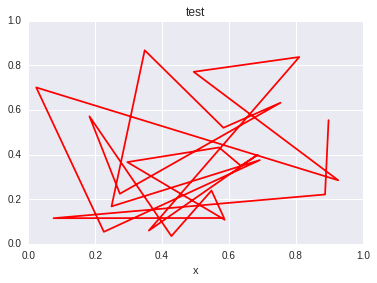

In [4]:
%matplotlib inline
from IPython.display import HTML
import analyze_lstm_activations as analyzer
#data_to_animate=np.array([perf_df[:].time, perf_df[:].x])
data_to_animate = np.random.rand(2, 25)
print("data is ", data_to_animate.shape)
anim = analyzer.animate_data_as_line(data_to_animate)
HTML(anim.to_html5_video())